# **Customer Churn Prediction for a Subscription-Based Streaming Platform**
## **by Sandy Sanjaya**


# **1. Project Overview & Objective**

## **Background**

Subscription-based businesses, such as video streaming platforms, rely **heavily on customer retention to sustain recurring revenue and long-term growth**. In a highly competitive market with low switching costs, customers can easily move to alternative services when they perceive a lack of value or engagement.

This situation leads to customer churn, defined as the condition in which customers stop using a service. High churn rates directly impact revenue stability and significantly increase customer acquisition costs. Therefore, understanding customer behavior and identifying early signs of churn through a data-driven approach is critical for subscription-based digital platforms.

## **Business Objective**

The primary objective of this project is to develop a customer churn prediction model to identify customers who are at high risk of canceling their subscription on a subscription-based video streaming platform.

More specifically, this project aims to:
* Identify customers with high churn risk at an early stage
* Determine the key factors driving customer churn based on user behavior and customer characteristics
* Provide data-driven retention recommendations to support business decision-making

## **Project Scope**

The scope of this project includes:

* Analyzing customer behavioral data from a subscription-based streaming platform
* Conducting Exploratory Data Analysis (EDA) to uncover patterns related to customer engagement and churn
* Building machine learning classification models for churn prediction
* Interpreting model results to identify the main drivers of churn
* Translating analytical findings into actionable business insights and recommendations

This project focuses on offline analysis using historical data and does not cover real-time deployment or production-level system implementation.

# **2. Import Libraries & Load Dataset**

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Interpretability
!pip install shap
import shap

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/Customer Churn Prediction for a Subscription-Based Streaming Platform/netflix_customer_churn.csv"
churn_df = pd.read_csv(data_path)

churn_df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


 ***The dataset was loaded directly from Google Drive to simulate a real-world data workflow commonly used in collaborative and cloud-based data science environments.***

# **3. Data Understanding**

## **A. Dataset Overview**

In [ ]:
# Check dataset shape
churn_df.shape

(5000, 14)

In [ ]:
# Preview data
churn_df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


## **B. Identify Target Variable**

In [ ]:
churn_df.columns
target = "churned"

## **C. Check Data Types & Missing Values**

In [ ]:
# Check data types & missing values
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [ ]:
# Missing values count
churn_df.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


## **D. Check Duplicate Records**

In [ ]:
# Check duplicates
print("Number of Duplicates: ", churn_df.duplicated().sum())

Number of Duplicates:  0


## **E. Check Statistical Summary**

In [ ]:
# Statistical summary
churn_df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


## **F. Feature Grouping**

**Numerical Features**

In [ ]:
numerical_features = churn_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_features

['age',
 'watch_hours',
 'last_login_days',
 'monthly_fee',
 'churned',
 'number_of_profiles',
 'avg_watch_time_per_day']

**Categorical Features**

In [ ]:
categorical_features = churn_df.select_dtypes(include=["object"]).columns.tolist()
categorical_features

['customer_id',
 'gender',
 'subscription_type',
 'region',
 'device',
 'payment_method',
 'favorite_genre']

**Remove Target from Feature List**

In [ ]:
numerical_features.remove(target)

***At this stage, the dataset has been reviewed to identify the target variable, feature types, and data quality. The absence of missing values and duplicates allows the analysis to proceed directly to exploratory data analysis (EDA) and feature engineering without extensive data cleaning.***

# **4. Data Cleaning & Preprocessing**

## **A. Duplicate Check (Data Cleaning)**

In [ ]:
# Check duplicate records
print("Number of Duplicates: ", churn_df.duplicated().sum())

Number of Duplicates:  0


In [ ]:
# Remove duplicates if any
churn_df = churn_df.drop_duplicates()

***Duplicate records were checked to ensure data integrity before further preprocessing.***

## **B. Handling Missing Values (Validation Step)**

In [ ]:
# Re-check missing values
churn_df.isnull().sum()

,0
customer_id,0
age,0
gender,0
subscription_type,0
watch_hours,0
last_login_days,0
region,0
device,0
monthly_fee,0
churned,0


***The dataset does not contain missing values, allowing the preprocessing phase to focus on feature transformation rather than data imputation.***

## **C. Feature Separation**

In [ ]:
# Define target and features
target = "churned"
X = churn_df.drop(columns=[target])
y = churn_df[target]

## **D. Categorical & Numerical Features**

In [ ]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

categorical_features, numerical_features

(['customer_id',
  'gender',
  'subscription_type',
  'region',
  'device',
  'payment_method',
  'favorite_genre'],
 ['age',
  'watch_hours',
  'last_login_days',
  'monthly_fee',
  'number_of_profiles',
  'avg_watch_time_per_day'])

## **E. Encoding Categorical Variables**

In [ ]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Encode each categorical feature into numerical format
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

***Categorical features were encoded to enable machine learning models to process non-numerical data.***

## **F. Feature Scaling**

In [ ]:
# Initialize standard scaler
scaler = StandardScaler()

# Scale numerical features to have zero mean and unit variance
X[numerical_features] = scaler.fit_transform(X[numerical_features])

***Feature scaling is applied to normalize numerical variables, preventing features with larger scales from dominating the model training process.***

# **5. Exploratory Data Analysis (EDA)**

## **A. Customer Churn Distribution**

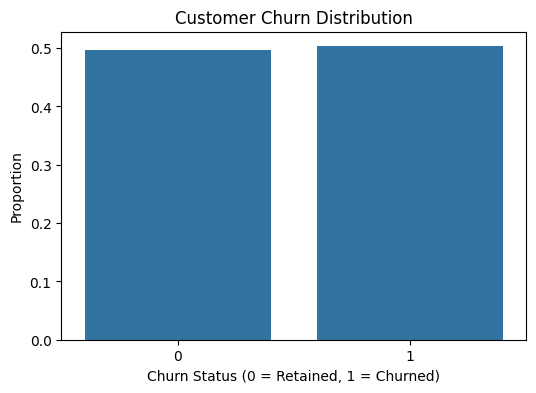

In [ ]:
# Calculate churn proportion
churn_rate = churn_df["churned"].value_counts(normalize=True)

# Visualize churn distribution
plt.figure(figsize=(6,4))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.title("Customer Churn Distribution")
plt.ylabel("Proportion")
plt.xlabel("Churn Status (0 = Retained, 1 = Churned)")
plt.show()

***This visualization illustrates the proportion of churned and retained customers on the platform. The distribution appears relatively balanced, indicating that churn is a significant and non-trivial issue rather than a rare event. This balanced class distribution allows the model to learn churn patterns without severe class imbalance bias, while also highlighting the business importance of churn prevention.***

## **B. Watch Hours vs Churn**

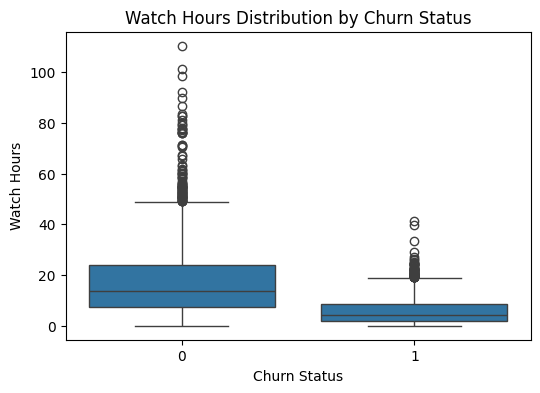

In [ ]:
# Compare watch hours distribution between churned and retained users
plt.figure(figsize=(6,4))
sns.boxplot(x="churned", y="watch_hours", data=churn_df)
plt.title("Watch Hours Distribution by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Watch Hours")
plt.show()

***This visualization compares customer watch hours across churned and retained groups to understand engagement behavior. Non-churned customers exhibit higher median watch hours and a broader distribution, indicating consistently stronger engagement compared to churned users. This pattern implies that watch hours is a critical behavioral signal for churn prediction and suggests that increasing user engagement could be an effective strategy for churn reduction.***

## **C. Last Login Recency & Churn**

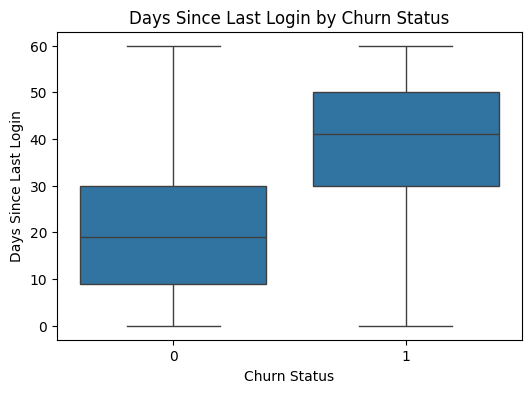

In [ ]:
# Analyze inactivity period differences between churned and retained users
plt.figure(figsize=(6,4))
sns.boxplot(x="churned", y="last_login_days", data=churn_df)
plt.title("Days Since Last Login by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Days Since Last Login")
plt.show()

***This visualization examines the number of days since last login across churned and retained users to capture inactivity patterns. Churned users display significantly longer periods of inactivity, with higher median values and a more right-shifted distribution compared to retained customers. This suggests that prolonged inactivity is a strong early warning signal for churn, indicating an opportunity for timely re-engagement interventions before customers cancel.***

## **D. Subscription Plan vs Churn**

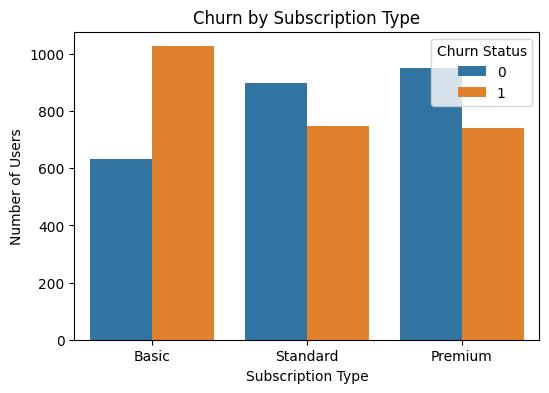

In [ ]:
# Examine churn distribution across different subscription types
plt.figure(figsize=(6,4))
sns.countplot(x="subscription_type", hue="churned", data=churn_df)
plt.title("Churn by Subscription Type")
plt.xlabel("Subscription Type")
plt.ylabel("Number of Users")
plt.legend(title="Churn Status")
plt.show()

***This visualization analyzes churn behavior across different subscription tiers to understand how plan type relates to customer retention. Basic-tier users exhibit a higher proportion of churn compared to Standard and Premium subscribers, while higher-tier plans show relatively stronger retention. This indicates that customers on lower-priced plans may perceive less value or commitment, suggesting that targeted value reinforcement or upgrade incentives could help reduce churn in the Basic segment.***

## **E. Device Type vs Churn**

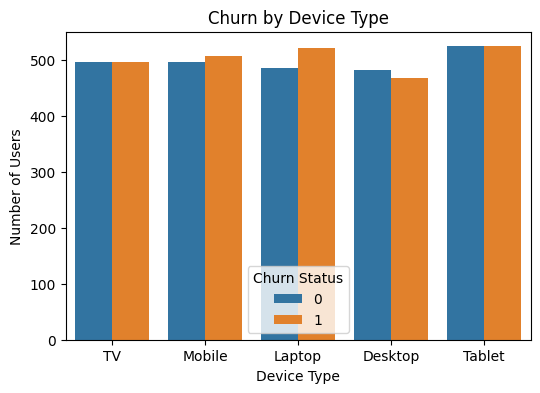

In [ ]:
# Analyze churn patterns across different device types
plt.figure(figsize=(6,4))
sns.countplot(x="device", hue="churned", data=churn_df)
plt.title("Churn by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Number of Users")
plt.legend(title="Churn Status")
plt.show()


***This visualization explores churn distribution across different device types to assess whether usage platforms relate to customer retention. Churn rates appear to vary by device, with certain devices showing a relatively higher proportion of churn compared to others, suggesting differences in engagement intensity or user experience. This pattern implies that device-specific optimization such as improving usability or performance on high-churn devices could be an effective lever for reducing churn.***

## **F. Payment Method vs Churn**

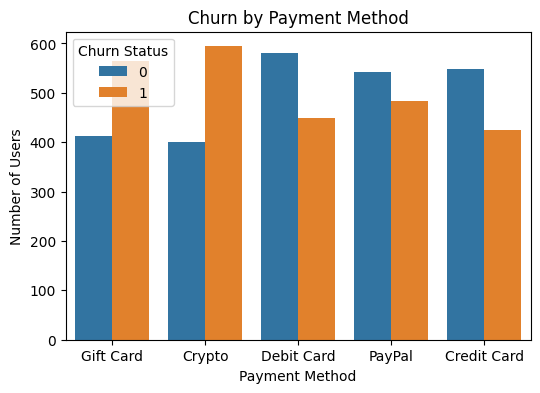

In [ ]:
# Evaluate churn distribution across different payment methods
plt.figure(figsize=(6,4))
sns.countplot(x="payment_method", hue="churned", data=churn_df)
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Users")
plt.legend(title="Churn Status")
plt.show()

***This visualization examines churn behavior across different payment methods to understand how payment preferences relate to customer retention. Users relying on less conventional payment methods, such as gift cards and crypto, show relatively higher churn compared to customers using debit or credit cards. This suggests that payment method can act as a proxy for customer stability and commitment, indicating that promoting more frictionless and recurring-friendly payment options may help reduce churn.***

## **G. Correlation Analysis**

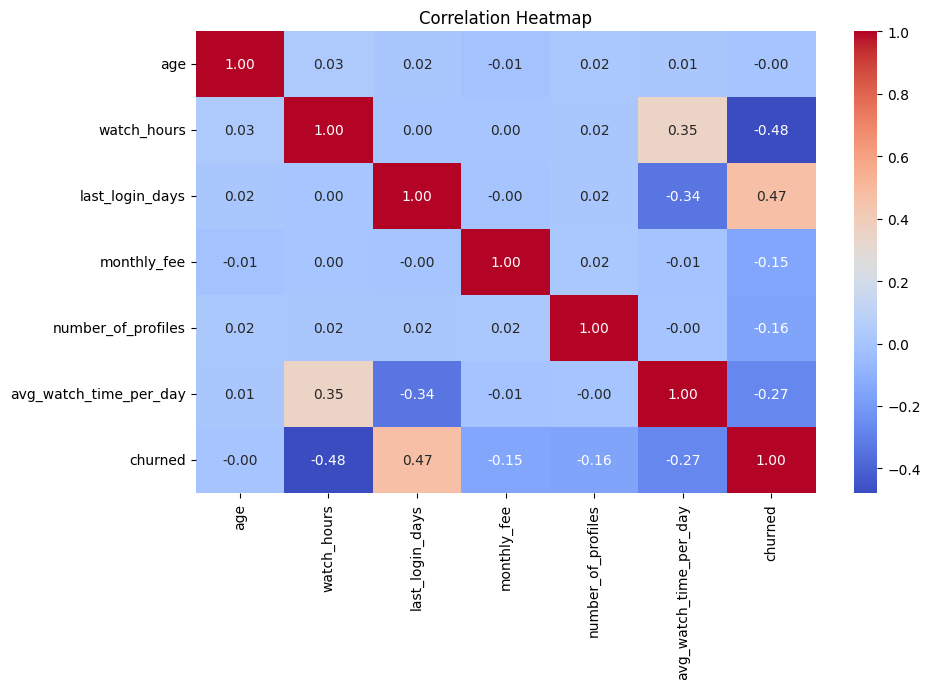

In [ ]:
# Visualize correlations between numerical features and churn
plt.figure(figsize=(10,6))
sns.heatmap(
    churn_df[numerical_features + ["churned"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

***Engagement-related features show stronger correlations with churn compared to demographic or static features.***

# **6. Modelling - Logistic Regression (Baseline Model)**

***I started with logistic regression as a baseline model because it is well-suited for binary classification problems like customer churn and provides high interpretability. This allows me to understand key churn drivers before moving to more complex models for performance comparison.***

## **A. Train-Test Split**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## **B. Train Logistic Regression Model**

In [ ]:
# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## **C. Model Prediction**

In [ ]:
# Predict class labels
y_pred = log_reg.predict(X_test)

# Predict churn probabilities
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

## **D. Model Evaluation**

***Classification Report***

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       497
           1       0.87      0.90      0.89       503

    accuracy                           0.89      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.89      0.89      0.88      1000



***Confusion Matrix***

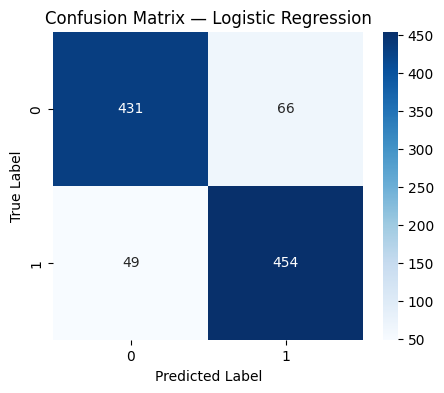

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — Logistic Regression")
plt.show()

***ROC Curve & AUC Score***

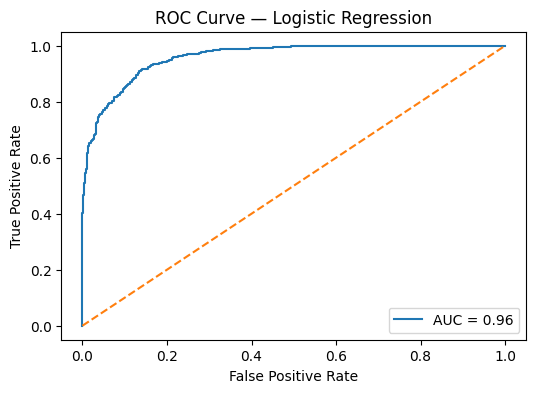

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.show()

📌***AUC Interpretation:***

0.5 → random

0.7-0.8 → good

0.8 → strong

## **E. Feature Importance (Interpretability)**

In [ ]:
# Create feature importance dataframe
feature_importance = pd.DataFrame({
    "feature": X.columns,
    "coefficient": log_reg.coef_[0]
})

# Sort by absolute coefficient value
feature_importance["abs_coef"] = feature_importance["coefficient"].abs()
feature_importance = feature_importance.sort_values(by="abs_coef", ascending=False)

feature_importance.head(10)

,feature,coefficient,abs_coef
11,avg_watch_time_per_day,-4.145842,4.145842
4,watch_hours,-3.430526,3.430526
5,last_login_days,2.144555,2.144555
10,number_of_profiles,-1.024422,1.024422
8,monthly_fee,-0.581570,0.581570
3,subscription_type,-0.554290,0.554290
2,gender,-0.062244,0.062244
1,age,0.027444,0.027444
6,region,0.024767,0.024767
9,payment_method,-0.019117,0.019117


***Logistic Regression serves as a baseline model for churn prediction, providing both predictive performance and interpretability. The model enables the identification of key behavioral drivers influencing customer churn, which is critical for data-driven retention strategies.***

# **7. Modeling — Random Forest Classifier (Model Comparison)**

## **A. Train Random Forest Model**

In [ ]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

## **B. Model Prediction**

In [ ]:
# Predict class labels
y_pred_rf = rf_model.predict(X_test)

# Predict churn probabilities
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

## **C. Model Evaluation**

***Classification Report***

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       497
           1       0.98      0.96      0.97       503

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



***Confusion Matrix***

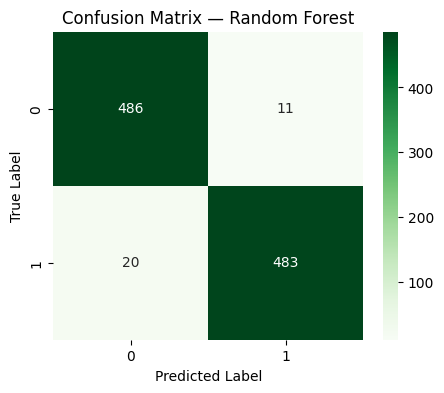

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — Random Forest")
plt.show()

***ROC Curve & AUC***

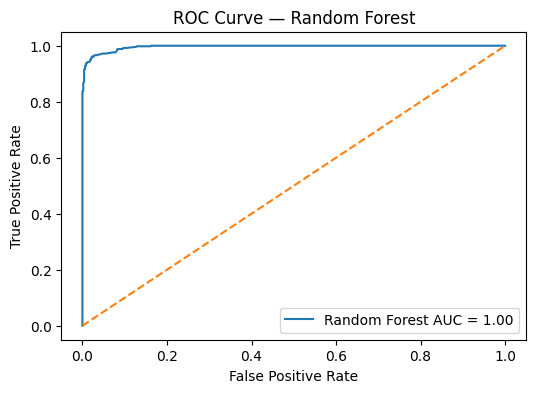

In [ ]:
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest AUC = {roc_auc_rf:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest")
plt.legend()
plt.show()

## **D. Feature Importance (Tree-Based)**

In [ ]:
# Feature importance from Random Forest
feature_importance_rf = pd.DataFrame({
    "feature": X.columns,
    "importance": rf_model.feature_importances_
})

feature_importance_rf = feature_importance_rf.sort_values(
    by="importance", ascending=False
)

feature_importance_rf.head(10)

,feature,importance
11,avg_watch_time_per_day,0.358137
4,watch_hours,0.219994
5,last_login_days,0.192391
10,number_of_profiles,0.065237
9,payment_method,0.032906
0,customer_id,0.026151
1,age,0.021576
3,subscription_type,0.021208
8,monthly_fee,0.021135
12,favorite_genre,0.012513


***Compared to Logistic Regression, the Random Forest model is able to capture non-linear relationships between features, resulting in improved predictive performance. However, Logistic Regression remains valuable for its interpretability and simplicity.***

# **8. Model Comparison Table**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression metrics
metrics_lr = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_pred_proba)
}

# Random Forest metrics
metrics_rf = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_pred_proba_rf)
}

In [ ]:
comparison_df = pd.DataFrame([metrics_lr, metrics_rf])
comparison_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.885,0.873077,0.902584,0.887586,0.958823
1,Random Forest,0.969,0.977733,0.960239,0.968907,0.996140


# **9. Threshold Tuning (Business-Oriented)**

In [ ]:
thresholds = [0.3, 0.4, 0.5, 0.6]
results = []

for t in thresholds:
    y_pred_tuned = (y_pred_proba_rf >= t).astype(int)

    results.append({
        "Threshold": t,
        "Precision": precision_score(y_test, y_pred_tuned),
        "Recall": recall_score(y_test, y_pred_tuned),
        "F1-Score": f1_score(y_test, y_pred_tuned)
    })

threshold_df = pd.DataFrame(results)
threshold_df


,Threshold,Precision,Recall,F1-Score
0,0.3,0.903986,0.992048,0.945972
1,0.4,0.938697,0.974155,0.956098
2,0.5,0.973790,0.960239,0.966967
3,0.6,0.991525,0.930417,0.960000


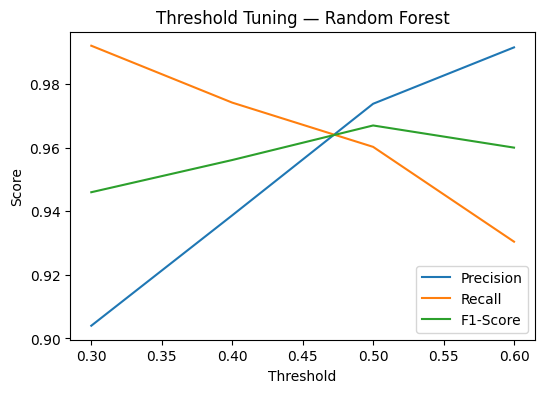

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(threshold_df["Threshold"], threshold_df["Precision"], label="Precision")
plt.plot(threshold_df["Threshold"], threshold_df["Recall"], label="Recall")
plt.plot(threshold_df["Threshold"], threshold_df["F1-Score"], label="F1-Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning — Random Forest")
plt.legend()
plt.show()

# **10. Model Interpretability**

## **Feature Importance Using Random Forest**

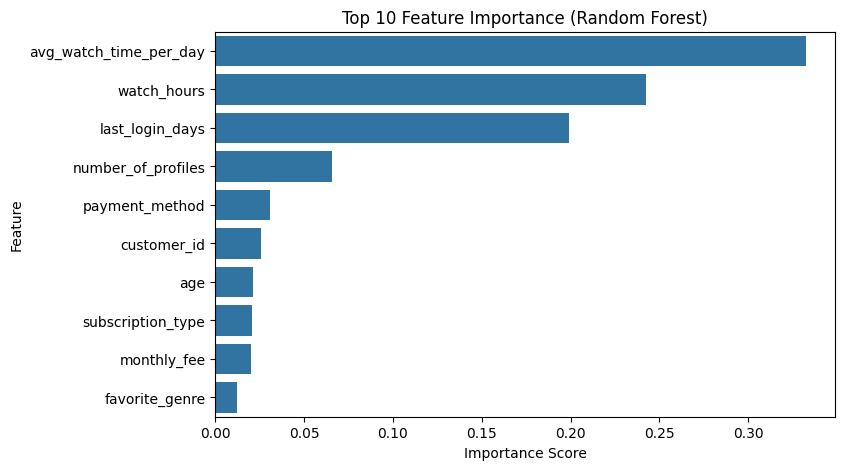

In [ ]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(
    x="importance",
    y="feature",
    data=feature_importance.head(10)
)
plt.title("Top 10 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

The feature importance results indicate that user engagement is the primary driver of churn.

The most influential features are `avg_watch_time_per_day`, `watch_hours`, and `last_login_days`. This shows that users who watch less content and become inactive for longer periods are significantly more likely to churn. Declining engagement can therefore be considered an early warning signal of churn.

The `number_of_profiles` feature has a moderate impact, suggesting that accounts with multiple profiles tend to be more engaged and less likely to churn compared to single-profile accounts.

In contrast, demographic and pricing-related features such as `age`, `monthly_fee`, `subscription_type`, and `payment_method` have relatively low importance. This implies that churn is driven more by behavioral patterns than by user demographics or pricing alone.

Overall, the model highlights that maintaining consistent user engagement is more critical for churn prevention than adjusting pricing or subscription plans.

# **Business Recommendation**

### **1. Strengthen User Engagement Programs** <br>
Since declining engagement is the strongest indicator of churn, the platform should focus on increasing daily watch time through personalized content recommendations, curated playlists, and timely content discovery features.

### **2. Early Intervention for Inactive Users** <br>
Users with increasing last_login_days should be targeted with re-engagement strategies such as push notifications, email reminders, or exclusive content promotions before they fully churn.

### **3. Promote Multi-Profile Usage** <br>
Encouraging users to create multiple profiles within one account can help increase overall engagement. This can be achieved through onboarding prompts or highlighting family and shared-account benefits.

### **4. Prioritize Behavioral Signals Over Pricing Changes** <br>
Since pricing and demographic factors have low impact on churn, retention efforts should prioritize improving user experience and engagement rather than relying heavily on discounts or pricing adjustments.